In [2]:
#Imports
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
def load_csv(filename):
    valores = read_csv (filename, header=None).to_numpy()
    return valores.astype(float)

In [4]:
def h(x, theta):
    return theta[0] + theta[1] * x

In [5]:
def cost_function(X, Y, theta):
    observed = h(X, theta)
    return func_coste(Y, observed)

In [6]:
def func_coste(expected, observed):
    dif = (1/(2*len(expected)))*np.sum(np.subtract(expected, observed)**2)
    return dif

In [62]:
def descenso_gradiente(X, Y, num_iteraciones=1500, alpha=0.01):
    #Inicializacion de los valores de theta0 y theta1
    theta0 = theta1 = 0
    # Numero de ejemplos de entrenamiento
    m = len(X)

    coste = list()
    for i in range(num_iteraciones):
        observed = h(X, [theta0, theta1])
        theta0 = theta0 - (alpha/m) * np.sum(observed - Y)
        theta1 = theta1 - (alpha/m) * np.sum((observed - Y) * X)
        coste.append(cost_function(X, Y, [theta0, theta1]))
        
    return theta0, theta1, coste

In [66]:
def lineal_regresion_one_variable():
    data = load_csv('ex1data1.csv')
    
    #Primera Columna
    X = data[:,0]
    #Segunda Columna
    Y = data[:,1]
    
    #Tamanho inicial de los saltos
    alpha = 0.01
    
    theta0, theta1, coste = descenso_gradiente(X ,Y , 1500,alpha)   
    #plt.plot(X, Y, "x")
    min_x = min(X)
    max_x = max(X)
    min_y = theta0 + theta1 * min_x
    max_y = theta0 + theta1 * max_x
    #plt.plot([min_x, max_x], [min_y, max_y], color='red', linewidth=2)
    
    #plt.plot(coste)
    #plt.xlabel('Iteraciones'); plt.ylabel("J($\\theta_{0}$,$\\theta_{1}$)")
    #plt.savefig("resultCoste.png")
    #plt.show
    
    #plt.plot(coste)
    #plt.show
    return [theta0, theta1, coste]
    

-3.6302914394043597
1.166362350335582


4.534245012944714

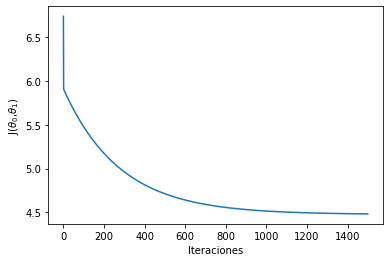

In [64]:
l = lineal_regresion_one_variable()
print(l[0])
print(l[1])
l[0] + l[1]*7

In [46]:
def make_data(t0_range, t1_range, X, Y, step=0.1):
    step = 0.1
    Theta0 = np.arange(t0_range[0], t0_range[1], step)
    Theta1 = np.arange(t1_range[0], t1_range[1], step)
    Theta0, Theta1 = np.meshgrid(Theta0, Theta1)
     # Theta0 y Theta1 tienen las misma dimensiones, de forma que
     # cogiendo un elemento de cada uno se generan las coordenadas x,y
     # de todos los puntos de la rejilla
    Coste = np.empty_like(Theta0)
    for ix, iy in np.ndindex(Theta0.shape):
        Coste[ix, iy] = cost_function(X, Y, [Theta0[ix, iy], Theta1[ix, iy]])
    
    #print(Coste)    
    return [Theta0, Theta1, Coste]

In [92]:
def show_contour(data, thetas):
    plt.contour(data[0],data[1],data[2],np.logspace(-2,3,20))
    #plt.plot(dataPoint)
    plt.plot(thetas[0], thetas[1],'rx');
    plt.xlabel('$\\theta_{0}$'); plt.ylabel("$\\theta_{1}$")
    #plt.contour(data[0],data[1],data[2])
    plt.savefig("part1_contour.png")

In [93]:
def show_mesh(data):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(data[0], data[1], data[2], cmap=cm.jet, linewidth=0, antialiased=False)
    ax.view_init(10, 240)
    
    plt.show()
    fig.savefig("part1_mesh.png")

In [94]:
def print_graphs():
    data = load_csv('ex1data1.csv')
    X = data[:, 0]
    Y = data[:, 1]
    grid_data = make_data([-10, 10], [-1, 4], X, Y)
    
    dataPoint = lineal_regresion_one_variable()
    show_contour(grid_data, dataPoint)
    show_mesh(grid_data)

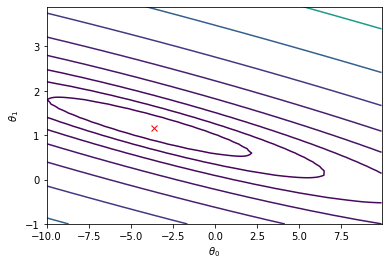

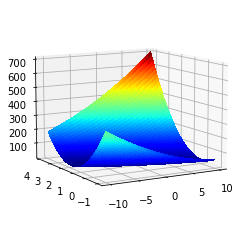

In [95]:
print_graphs()

## Parte 2

In [36]:
def h_vec(x, theta):
    return np.dot(x, theta)

In [37]:
def norm(X):
    X_norm = np.copy(X)
    means = []
    std = []
    for i in range(n):
        means.append(np.mean(X[:,i]))
        std.append(np.std(X[:,i]))
        X_norm[:,i] = (X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])
        
    return X_norm, means, std

[340412.56301439 109370.05670466  -6500.61509507]


293098.4666757651

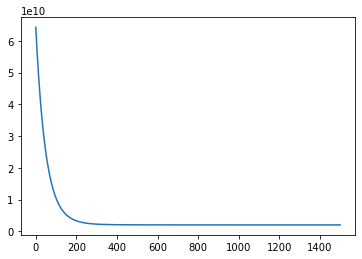

In [42]:
#Código para descenso de gradiente
datos = load_csv('ex1data2.csv')
#Guardamos la matriz de entrada, todas las columnas menos la última
X = datos[:, :-1]
np.shape(X)         # (97, 1)
#Ultima columna es la salida
Y = datos[:, -1]
np.shape(Y)         # (97,)
m = np.shape(X)[0]
n = np.shape(X)[1]

#normalizamos los datos
data =  norm(X)
X = data[0]
Means = data[1]
Std = data[2]

# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

alpha = 0.01
#Calculamos mediente descenso de gradiente la lista de Thetas y devolvemos el descenso del coste
Thetas, costes = descenso_gradiente(X, Y, alpha)
print(Thetas)

#Predicción con datos de entrada normalizados
h_vec([1,(1650-Means[0])/Std[0] ,(3-Means[1])/Std[1]], Thetas)


In [62]:
#Código para ecuación normal
datos = load_csv('ex1data2.csv')
#Guardamos la matriz de entrada, todas las columnas menos la última
X = datos[:, :-1]
np.shape(X)         # (97, 1)
#Ultima columna es la salida
Y = datos[:, -1]
np.shape(Y)         # (97,)
m = np.shape(X)[0]
n = np.shape(X)[1]


# añadimos una columna de 1's a la X
X = np.hstack([np.ones([m, 1]), X])

func_transpose(X,Y)

#Predicción 
h_vec([1,1650,3], func_transpose(X,Y))

293081.4643349892

In [53]:
def func_transpose(X, Y):
    #Realizamos la traspuesta Xt
    transpuesta_x = np.transpose(X)
    #Psudo inversa de una matriz (XtX)^-1
    inverse_matrix = np.linalg.pinv(np.dot(transpuesta_x, X))
    #(XtX)^-1 Xt
    second_mul = np.dot(inverse_matrix, transpuesta_x)
    #(XtX)^-1 Xt Y
    y_mul = np.dot(second_mul, Y)
    
    return y_mul


In [39]:
def coste(X, Y, Theta):
    H = np.dot(X, Theta)
    Aux = (H - Y) ** 2
    return Aux.sum() / (2 * len(X))
    #return (1/(2 * len(X)))*np.dot(np.transpose(H-Y),(H-Y))

In [34]:
def descenso_gradiente(X, Y, alpha):
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    thetas = np.zeros(n)
    costes = list()
    for i in range(1500):
        #Vector de differencia entre la función con la Thetas de esta iteración y los valores reales Y
        Aux = (h_vec(X, thetas) - Y)
        
        sum_x = np.dot(Aux, X)
        thetas -= (alpha / m) * sum_x   
        
        #Guardamos el valor de la función de coste de cada iteración
        costes.append(coste(X, Y, thetas))
        
    plt.plot(costes)
    plt.xlabel('Iteraciones'); plt.ylabel("J($\\theta_{0}$,$\\theta_{1}$)")
    plt.savefig("part2_costes.png")
    plt.show
    
    return thetas, costes

In [25]:
def lineal_regresion_multiple_variable():
    data = load_csv('ex1data1.csv')
    
    #Primera Columna
    X = data[:,0]
    #Segunda Columna
    Y = data[:,1]
    
    # Numero de ejemplos de entrenamiento
    m = len(X)
    #Tamanho inicial de los saltos
    alpha = 0.01
    #Inicializacion de los valores de theta0 y theta1
    theta0 = theta1 = 0

    
    
    #plt.plot(coste)
    #plt.show
    return [theta0, theta1, coste]